<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Pogozhev-Denis-branch/NetOptic_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Модель распознавания материалов.

За основу взят теоретический ноутбук занятия по сверточным нейронным сетям

##Создание и загрузка датасета.

В качестве датасета используются изображения из папок Комбинированный, Металл, Пластик каталога TOTAL_folder, объединенные в отдельном каталоге NetOptic_datase на Google-диске.

Загрузка датасета в Colab и распаковка архива




In [ ]:
import gdown
gdown.download("https://drive.google.com/uc?id=1q9aLl2xltghUtXDTOQfJsuyy1OClqEB5", "NetOptic.zip", quiet=True)

'NetOptic.zip'

In [ ]:
#Распаковка архива:
!unzip -qo "NetOptic.zip" -d /content/NetOptic_dataset

Для подготовки датасета необходимо:
1. Выполнить сортировку изображений путем создания списка файлов и списка меток
2. Преобразовать изображения в формат numpy
3. Выполнить нормализацию данных
4. Выполнить аугментацию данных
5. Разделить данные на обучающую, проверочную и тестовую выборки.


##Сортировка изображения. Создание списка файлов и списка меток


In [ ]:
import os
IMAGE_DIR = '/content/NetOptic_dataset/'
os.listdir(IMAGE_DIR)  # Список папок в директории


['Combi', 'Metall', 'Plastic']

In [ ]:
#Создание списка классов изображений
CLASS_LIST = sorted(os.listdir(IMAGE_DIR))
print(CLASS_LIST, type(CLASS_LIST))


['Combi', 'Metall', 'Plastic'] <class 'list'>


Для создания обучающей базы необходимо создать список всех изображений очков, отсортированных по материалам, а также список меток этих изображений. Метки должны быть в том же порядке, что и изображения.

In [ ]:
#Создаем списки для изображений и меток
data_image=[]
data_labels=[]

for l in range(3):   #перебираем в цикле для всех классов
  class_name = CLASS_LIST[l]
  class_path = IMAGE_DIR + class_name   #Полный путь к папке с изображениями
  class_file = os.listdir(class_path)   #Получение списка  имен файлов
  print(f'Класс {class_name} {len(class_file)} изображений')

  #Полученный полный путь к файлу с изображением добавляем в список изображений
  data_image += [f'{class_path}/{file_name}' for file_name in class_file]

  # Добавление ксписку меток текущего класса
  data_labels += [l] * len(class_file)

print(f"Общий размер базы {len(data_image)} изображений")



Класс Combi 514 изображений
Класс Metall 418 изображений
Класс Plastic 499 изображений
Общий размер базы 1431 изображений


При помощи библиотеки PIL выведем изображение и его метку:
 0 - комбинированный
 1 - металл
 2 - пластик

In [ ]:
NUM_IMAGE = 1258
data_image[NUM_IMAGE]

'/content/NetOptic_dataset/Plastic/giorgio-armani-ga965-7c5-s2-1 (3).jpg'

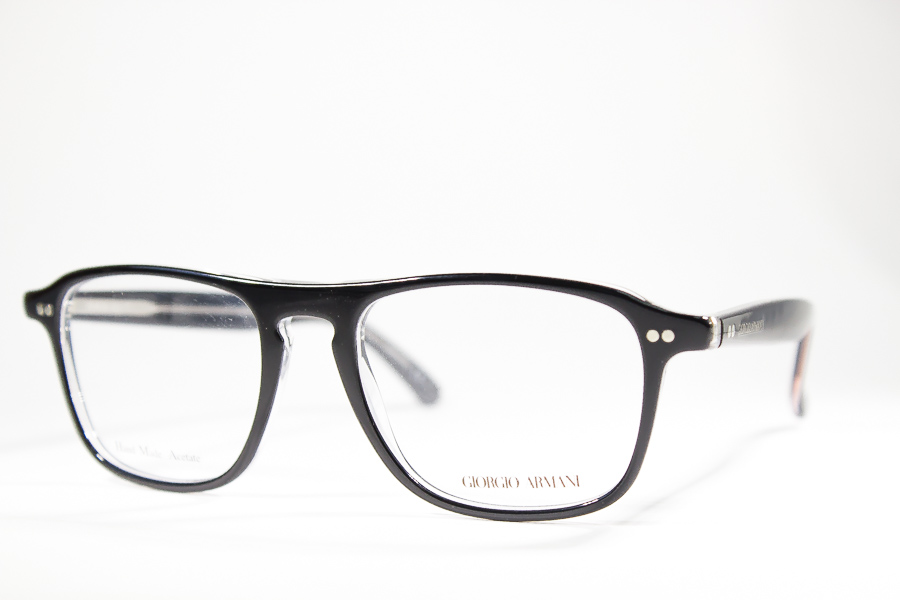

2


In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open(data_image[NUM_IMAGE])
display(img)
print(data_labels[NUM_IMAGE])




##Преобразование изображения в массив NUMPY. Нормализация данных


In [ ]:
import numpy as np

#Задаем размеры изображения
IMG_W = 128                           # Ширина изображения
IMG_H = 64                            # Высота изображения

#Создаем пустой список для хранения данных изображений
data_arr = []

for f in data_image:
    img = Image.open(f).resize((IMG_W, IMG_H))   # Изменение размера изображения
    img_np = np.array(img)                # Перевод в numpy-массив
    data_arr.append(img_np)               # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_arr)               # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив


Проверка формата данных в np-массиве

In [ ]:
print(f"Формат массива данных: {x_data.shape}")
print(f"Формат массива меток: {y_data.shape}")
x_data[NUM_IMAGE]

Формат массива данных: (1431, 64, 128, 3)
Формат массива меток: (1431,)


array([[[242, 241, 239],
        [243, 242, 240],
        [244, 243, 241],
        ...,
        [233, 232, 230],
        [232, 231, 229],
        [232, 229, 227]],

       [[243, 242, 240],
        [244, 243, 241],
        [244, 243, 241],
        ...,
        [234, 233, 231],
        [233, 232, 230],
        [232, 231, 229]],

       [[244, 243, 241],
        [244, 243, 241],
        [244, 244, 242],
        ...,
        [235, 234, 232],
        [234, 233, 231],
        [233, 232, 230]],

       ...,

       [[250, 250, 248],
        [250, 250, 248],
        [250, 250, 248],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 249, 247],
        [249, 250, 248],
        [249, 249, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 246],
        [248, 248, 246],
        [249, 249, 247],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

Выполним нормализацию данных = приведение в диапазон 0...1

In [ ]:
x_data = x_data / 255.
x_data[NUM_IMAGE]


array([[[0.94901961, 0.94509804, 0.9372549 ],
        [0.95294118, 0.94901961, 0.94117647],
        [0.95686275, 0.95294118, 0.94509804],
        ...,
        [0.91372549, 0.90980392, 0.90196078],
        [0.90980392, 0.90588235, 0.89803922],
        [0.90980392, 0.89803922, 0.89019608]],

       [[0.95294118, 0.94901961, 0.94117647],
        [0.95686275, 0.95294118, 0.94509804],
        [0.95686275, 0.95294118, 0.94509804],
        ...,
        [0.91764706, 0.91372549, 0.90588235],
        [0.91372549, 0.90980392, 0.90196078],
        [0.90980392, 0.90588235, 0.89803922]],

       [[0.95686275, 0.95294118, 0.94509804],
        [0.95686275, 0.95294118, 0.94509804],
        [0.95686275, 0.95686275, 0.94901961],
        ...,
        [0.92156863, 0.91764706, 0.90980392],
        [0.91764706, 0.91372549, 0.90588235],
        [0.91372549, 0.90980392, 0.90196078]],

       ...,

       [[0.98039216, 0.98039216, 0.97254902],
        [0.98039216, 0.98039216, 0.97254902],
        [0.98039216, 0

## Аугментация данных. Разделение датасета на на обучающую, проверочную и тестовую выборки.

Зададим гиперпараметры

In [ ]:
TEST_SPLIT          = 0.1                   # Доля тестовых данных в общем наборе
VAL_SPLIT           = 0.2                   # Доля проверочной выборки в обучающем наборе

IMG_WIDTH           = 128                   # Ширина изображения для нейросети
IMG_HEIGHT          = 64                    # Высота изображения для нейросети
IMG_CHANNELS        = 3                     # Количество каналов (для RGB равно 3, для Grey равно 1)

# Параметры аугментации
ROTATION_RANGE      = 8                     # Пределы поворота
WIDTH_SHIFT_RANGE   = 0.15                  # Пределы сдвига по горизонтали
HEIGHT_SHIFT_RANGE  = 0.15                  # Пределы сдвига по вертикали
ZOOM_RANGE          = 0.15                  # Пределы увеличения/уменьшения
BRIGHTNESS_RANGE    = (0.7, 1.3)            # Пределы изменения яркости
HORIZONTAL_FLIP     = True                  # Горизонтальное отражение разрешено

Выделение из общего датасета изображений для тестовой выборки

In [ ]:
os.mkdir('/content/NetOptic_test')